<a href="https://colab.research.google.com/github/gabrielalimact/DIP_20222/blob/main/histogram_matching/istogram_matching_dpi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [25]:
img_src = cv2.cvtColor(cv2.imread('./img3.jpg'), cv2.COLOR_BGR2RGB) # origem
img_dst = cv2.cvtColor(cv2.imread('./barto.jpg'), cv2.COLOR_BGR2RGB) # destino

# criar a imagem HSV
img_src_hsv = cv2.cvtColor(img_src, cv2.COLOR_BGR2HSV) 
img_dst_hsv = cv2.cvtColor(img_dst, cv2.COLOR_BGR2HSV)

# equalizar o histograma da imagem src
img_src_hsv[:, :, 2] = cv2.equalizeHist(img_src_hsv[:, :, 2])

# histogramas das imagens
hist_src, bins = np.histogram(img_src_hsv[:, :, 0], 256, [0, 256])
hist_dst, bins = np.histogram(img_dst_hsv[:, :, 0], 256, [0, 256])
hist_src_norm = hist_src / float(img_src_hsv.shape[0] * img_src_hsv.shape[1])
hist_dst_norm = hist_dst / float(img_dst_hsv.shape[0] * img_dst_hsv.shape[1])

# distribuições cumulativas dos histogramas
cum_src = hist_src_norm.cumsum()
cum_dst = hist_dst_norm.cumsum()

# pegar os valores do canal H da imagem de src para a dst
lut = np.interp(cum_src, cum_dst, np.arange(256))
img_src_hsv[:, :, 0] = cv2.LUT(img_src_hsv[:, :, 0], lut)

# converter a imagem de volta para o espaço de cores BGR
img_src_matched = cv2.imwrite('matched.jpg' ,cv2.cvtColor(img_src_hsv, cv2.COLOR_HSV2BGR))
img_matched = cv2.imread('./matched.jpg')

(<Axes: >, <matplotlib.image.AxesImage at 0x7fda3f57ea00>)

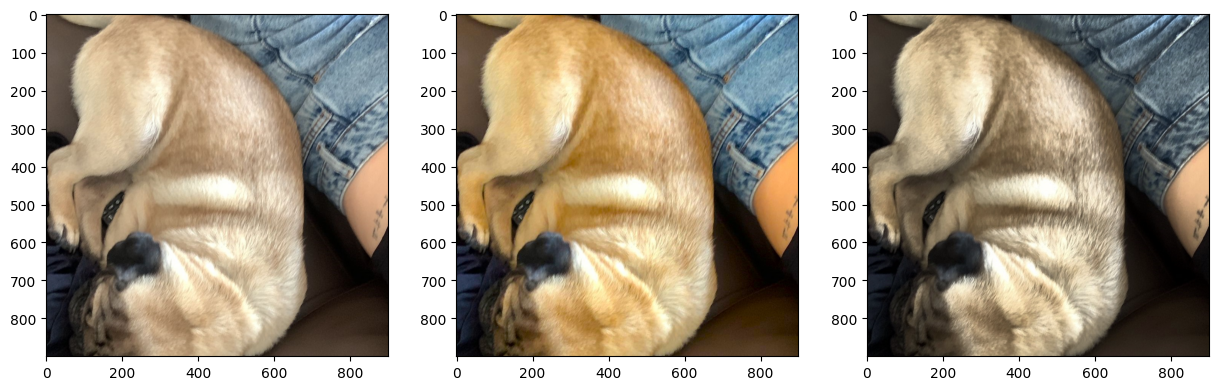

In [26]:
plt.figure(figsize=(15,15))
plt.subplot(131), plt.imshow(img_src)
plt.subplot(132), plt.imshow(img_dst)
plt.subplot(133), plt.imshow(img_matched)